# Приоритизация гипотез, A/B-тест и анализ результатов

Задачи проекта:

 - Выявить самую приоритетную гипотезу;
 - Провести А/В тест: 
 
  1) Построить график кумулятивной выручки по группам;
  
  2) Построить график кумулятивного среднего чека по группам;
  
  3) Построить график относительного изменения кумулятивного среднего чека группы B к группе A; 
  
  4) Построить график кумулятивной конверсии по группам; 
  
  5) Построить график относительного изменения кумулятивной конверсии группы B к группе A; 
  
  6) Построить точечный график количества заказов по пользователям и выявить границу для определения аномальных пользователей; 
  
  7) Построить точечный график стоимостей заказов и выявить границу для определения аномальных пользователей; 
  
  8) Рассчитать статистическую значимость различий в конверсии между группами по «сырым» данным; 
  
  9) Рассчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным; 
  
  10) Рассчитать статистическую значимость различий в конверсии между группами по «очищенным» данным; 
  
  11) Рассчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. ; 
  
  
 - Сделать выводы по результатам теста.

## Часть 1. Приоритизация гипотез.

### Подготовка данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#откроем таблицу hypothesis и выведем её на экран
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# Увеличим количество обображаемых символов
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# приведём названия столбцов к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)

# Просмотрим основную информацию по данной таблице
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Нет пропущенных значений и каждый столбец соотвествует своему типу данных. Менять ничего не нужно.

В таблице 9 строк и 5 столбцов:

 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Расчёт ICE

In [4]:
# Рассчитаем Ice по формуле Impact * Confidence / Efforts
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])

# Отсортируем таблицу и выведем по убыванию показателя ICE
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


По данной сортировке самые приоритетные теории:
 - 8 теория: "Запустить акцию, дающую скидку на товар в день рождения" с ICE равной 16
 - 0 теория: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с ICE равной 13
 - 7 теория: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с ICE равной 11

### Расчёт RICE

In [5]:
# Рассчитаем Rice по формуле Impact * Confidence * Reach / Efforts
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']

# Отсортируем таблицу и выведем по убыванию показателя RICE и ICE
hypothesis = hypothesis[['hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False).style

hypothesis

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1


In [6]:
def highlight_max(hypothesis, props=''):
    return np.where(hypothesis == np.nanmax(hypothesis.values), props, '')
hypothesis.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1


По данной сортировке самые приоритетные теории:
 - 7 теория: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с RICE равной 112
 - 2 теория: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" с RICE равной 56
 - 0 теория: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с RICE равной 40

### Вывод

При приоритизации теорий мы выявили теорию с самым высоким приоритетом, это 7 теория: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

При расчёте ICE эта теория занимала 3 место в рейтинге, но при расчёте RICE она стала на первом месте, т.к. при расчёте используется ещё показатель Reach — охват пользователей по 10-балльной шкале.

7 теория имеет охват пользователь 10 из 10.

## Часть 2. Анализ A/B-теста

### Подготовка данных

In [7]:
#откроем таблицу orders и выведем её на экран
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# Просмотрим основную информацию по данной таблице
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# Приведём столбец с датой к типу данный даты
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x,'%Y-%m-%d')
)

# Посмотрим, есть ли у нас пользователи попавшие в обе группы теста
common_clients = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
print(len(common_clients), 'пользователей попали в обе группы')

58 пользователей попали в обе группы


In [10]:
# удалим из нашей таблицы клиентов из группы abnormalUsers
orders = orders.loc[~orders['visitorId'].isin(common_clients)]

In [11]:
#откроем таблицу visitors и выведем её на экран
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# Просмотрим основную информацию по данной таблице
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# Приведём столбец с датой к типу данный даты
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Таблица orders имеет 1197 строк и 5 столбцов:

 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.

Таблица visitors имеет 62 строки и 3 столбца:
 
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.
 
У таблиц нет пропущенных значений, но у столбцов date я изменила тип данных с object на дату.

###  Построим график кумулятивной выручки по группам.

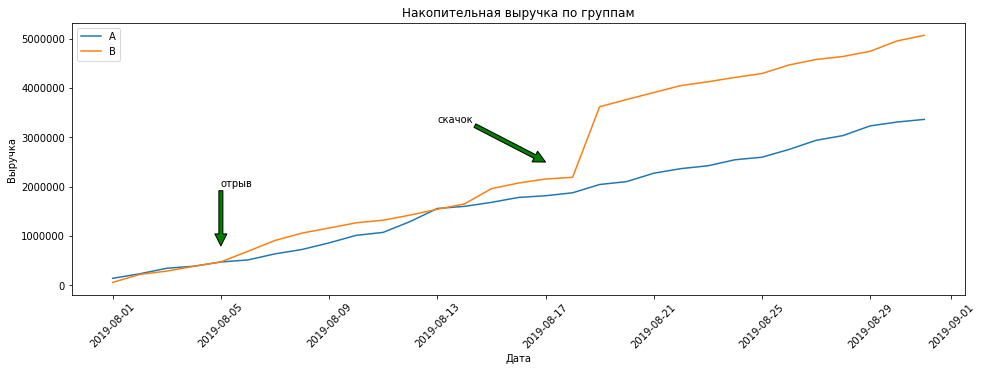

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Создадим код для ежедневного счёта результатов тестирования
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Добавим подписи к графику
plt.legend()
plt.title('Накопительная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)

plt.annotate('скачок', xy=('2019-08-17', 2500000), xytext=('2019-08-13', 3300000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'));

Выручка почти равномерно увеличивается в течение всего теста.

Однако график выручки в группе B в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

В целом группа B имеет большую выручку, относительно группы A.

###  Построим график кумулятивного среднего чека по группам.

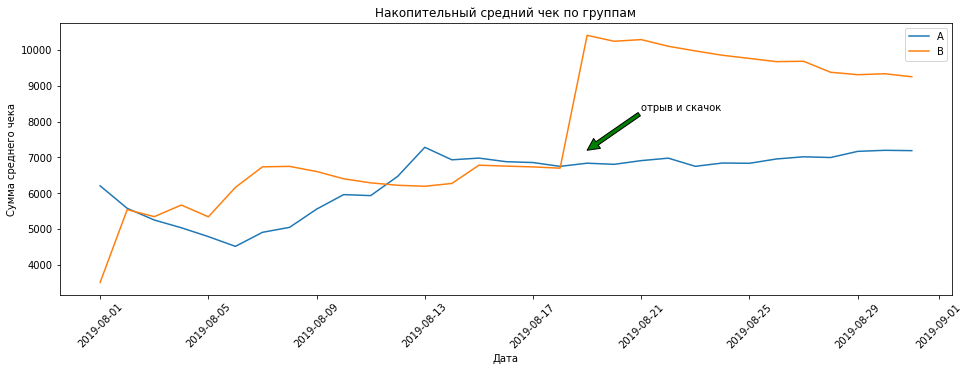

In [15]:
# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# Построим график кумулятивного среднего чека (для этого сумму заказов делим на количество заказов)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# Добавим подписи к графику
plt.legend()
plt.title('Накопительный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.xticks(rotation=45)

plt.annotate('отрыв и скачок', xy=('2019-08-19', 7200), xytext=('2019-08-21', 8300),
            arrowprops=dict(facecolor='g'));

Средний чек, если исключить резкие скачки тоже понемногу растёт.

Однако линии имеют скачкообразный вид. Это значит, что были дорогие заказы.

По данному графику трудно судить, у какой группы более высокий средний чек.

###  Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

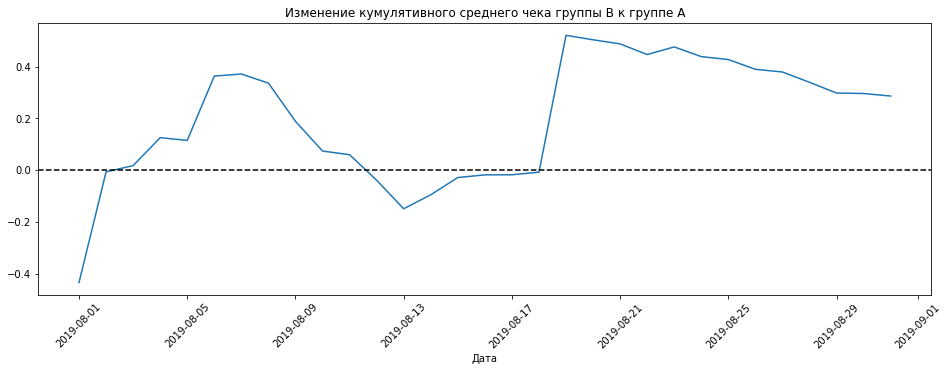

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# Добавим подписи к графику
plt.title('Изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.xticks(rotation=45);

В нескольких точках график различия между сегментами резко «скачет». Значит у нас точно в выборке есть крупные заказы и выбросы.

###  Построим график кумулятивной конверсии по группам.

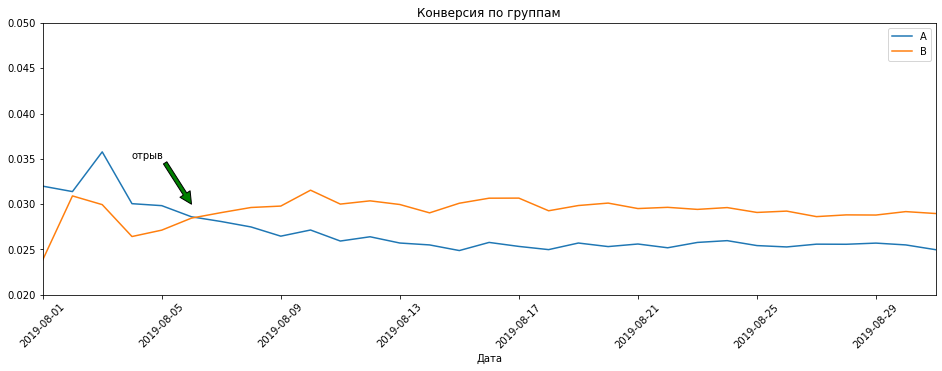

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.05])

# Добавим подписи к графику
plt.legend()
plt.title('Конверсия по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)


plt.annotate('отрыв', xy=('2019-08-06', 0.03), xytext=('2019-08-04', 0.035),
            arrowprops=dict(facecolor='g'));

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

###  Построим график относительного изменения кумулятивной конверсии группы B к группе A.

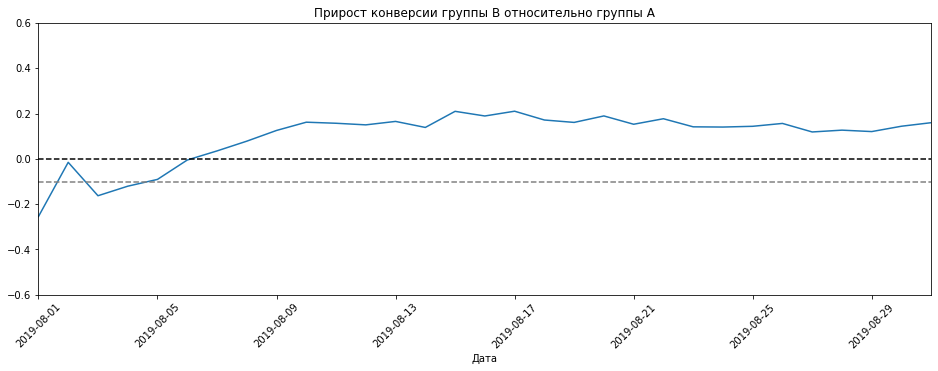

In [18]:
#Построим график относительного различия кумулятивных конверсий:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

# Добавим подписи к графику
plt.title('Прирост конверсии группы В относительно группы А')
plt.xlabel('Дата')
plt.xticks(rotation=45);

В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд. Потом её конверсия стала немного падать, но теперь постепенно растёт.

В целом отношение конверсии группы B выше конверсии группы А, но делать выводы рано, так как скорее всего в данных есть выбросы, которые сильно влияют на результаты. 

###  Построим точечный график количества заказов по пользователям.

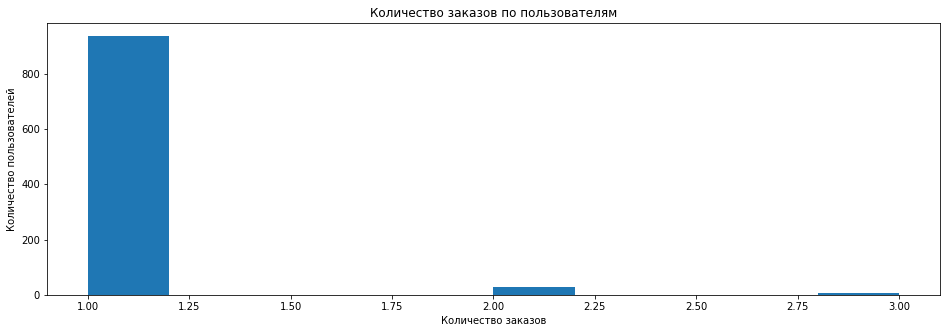

In [19]:
# Выведем таблицу с количество заказов по пользователям

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# Переименуем столбцы в таблице
ordersByUsers.columns = ['userId', 'orders']

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# Построим гистрограмму распределения количества заказов на одного пользователя.
plt.hist(ordersByUsers['orders'])

# Добавим подписи к графику
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 

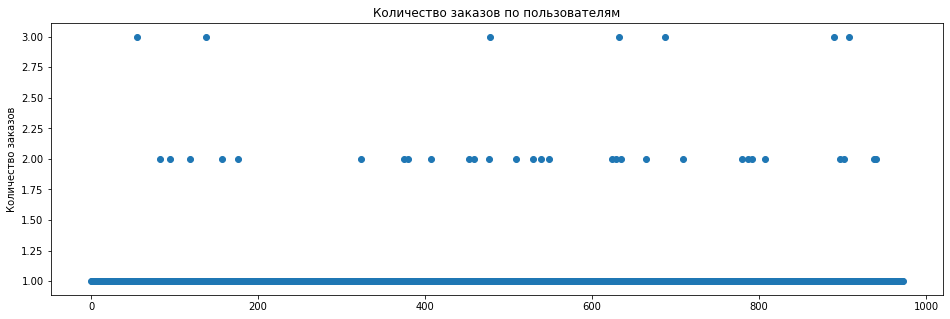

In [20]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

plt.scatter(x_values, ordersByUsers['orders'])

# Добавим подписи к графику
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов');

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Нужно высчитать перцентили.

###  Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [21]:
# Высчитаем 95 и 99 перцентили
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 1% пользователей оформляли больше чем 2 заказа.

Выберем 2 заказ на одного пользователя за нижнюю границу числа заказов. 

###  Построим точечный график стоимостей заказов.

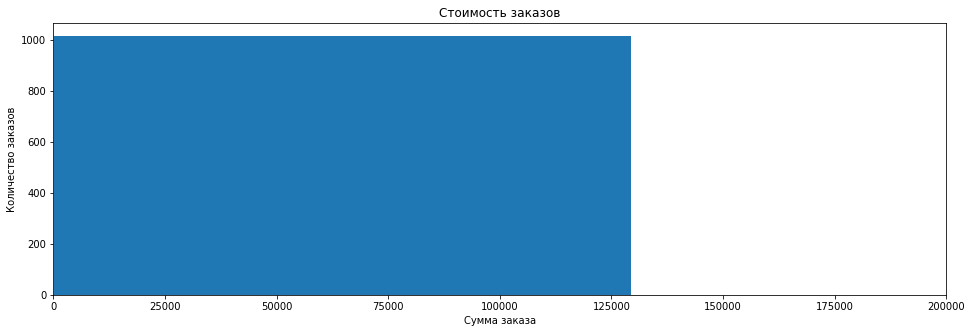

In [22]:
# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# Построим гистрограмму распределения стоимости заказов
plt.hist(orders['revenue'])
plt.xlim(0,200000)

# Добавим подписи к графику
plt.title('Стоимость заказов')
plt.xlabel('Сумма заказа')
plt.ylabel('Количество заказов');

По данному графику сложно сделать какие-то выводы, построю точечный график стоимости заказов.

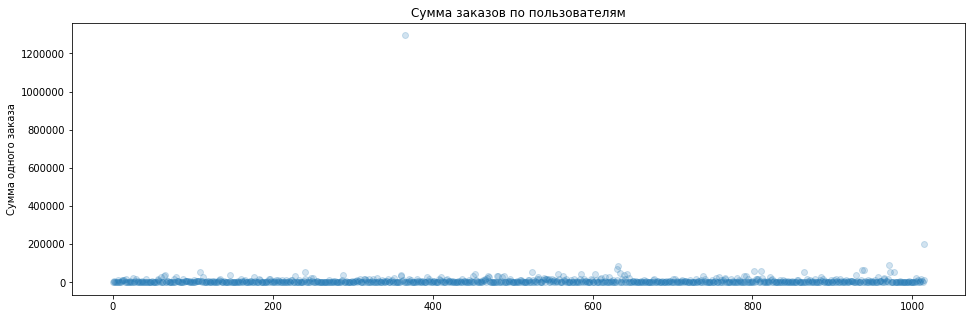

In [23]:
# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# Построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha = 0.2)

# Добавим подписи к графику
plt.title('Сумма заказов по пользователям')
plt.ylabel('Сумма одного заказа');

Большинство сумм заказов лежит до 100000 рублей, есть два точечных выброса, но они наверняка очень сильно влияются на данные. Нужно расчитать перцентили.

###  Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [24]:
# Высчитаем 95 и 99 перцентили
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей оформляли заказы на сумму 26 785. И 1% пользователей заказывали на сумму больше 53 904.

Выберем сумму в 35000 за нижнюю границу суммы заказов.

###  Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Сначала создадим таблицу для дальнейших расчётов

In [25]:
# Создадим таблицу по визитам на сайт от группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
# Переименуем название столбцов
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Рассчитаем visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Создадим таблицу по визитам на сайт от группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
# Переименуем название столбцов
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Рассчитаем visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#Рассчитаем ordersPerDateA — количество заказов в выбранную дату в группе A
#И revenuePerDateA — суммарная выручка в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


#Рассчитаем ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A
#И revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#Рассчитаем ordersPerDateB — количество заказов в выбранную дату в группе B
#И revenuePerDateB — суммарная выручка в выбранную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#Рассчитаем ordersCummulativeB — суммарное число заказов до выбранной даты включительно в группе B
#И revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Создадим таблицу для дальнейших расчётов объединив все остальные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Содержание столбцов следующее:

 -	date — дата;
 -	ordersPerDateA — количество заказов в выбранную дату в группе A;
 -	revenuePerDateA — суммарная выручка в выбранную дату в группе A;
 -	ordersPerDateB — количество заказов в выбранную дату в группе B;
 -	revenuePerDateB — суммарная выручка в выбранную дату в группе B;
 -	ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
 -	revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
 -	ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
 -	revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
 -	visitorsPerDateA — количество пользователей в выбранную дату в группе A;
 -	visitorsPerDateB — количество пользователей в выбранную дату в группе B;
 -	visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
 -	visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Сформируем наши гипотезы:

 - Нулевая гипотеза: Статистически значимых различий в конверсии между группами нет.
 - Обратная гипотеза: Статистически значимые различия в конверсии между группами есть.

In [26]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Вывод: По «сырым» данным есть различия в конверсии групп A и B. 

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

Выигрыш группы B равен 16% — второе число в выводе. 

###  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформируем наши гипотезы:

 - Нулевая гипотеза: В среднем чеке между группами есть различия.
 - Обратная гипотеза: В среднем чеке между группами различий нет.

In [27]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-value (первое число) значительно больше 0.05. Значит мы не отвергаем нулевую гипотезу, о том, что в среднем чеке между группами есть различия. 

Средний чек группы B значительно выше среднего чека группы A, почти на 29%.

###  Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [28]:
# Сделаем срезы пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# Сделаем срезы пользователей, совершивших заказы дороже 20 000
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']

# Объединим наши таблицы
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Узнаем, сколько всего аномальных пользователей методом shape().
print(abnormalUsers.shape) 

(37,)


У нас 37 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста.

In [29]:
# Объявим переменные sampleAFiltered и sampleBFiltered
# в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули
# Без наших 37 пользователей

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# Применим статистический критерий Манна-Уитни к полученным выборкам:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.194


Результаты по конверсии изменились, выигрыш группы B вырос с 16% до 19,4%

Посмотрим на графике, как изменилась кумулятивная конверсии группы B к группе A, без наших выбросов.

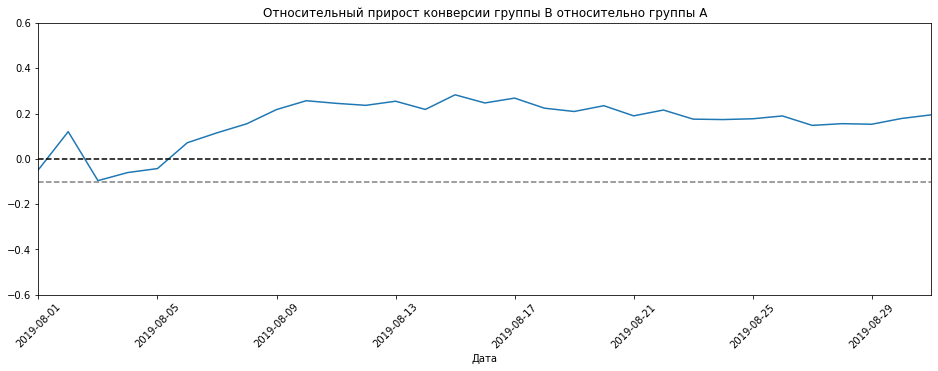

In [30]:
# Для этого удалим из нашей таблицы клиентов из группы abnormalUsers
orders = orders.loc[~orders['visitorId'].isin(abnormalUsers)]

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Создадим код для ежедневного счёта результатов тестирования
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Построим график относительного различия кумулятивных конверсий:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

# Добавим подписи к графику
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.xticks(rotation=45);

В начале теста группа B шла вровень с группой A, затем вырвалась вперёд. Потом её конверсия стала немного падать, но теперь постепенно растёт.

###  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [31]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.869
0.003


P-value увеличился, но и разница между сегментами сократилась с 28% до 3%.

Посмотрим на графике, как изменился средний чек между группами, без наших выбросов.

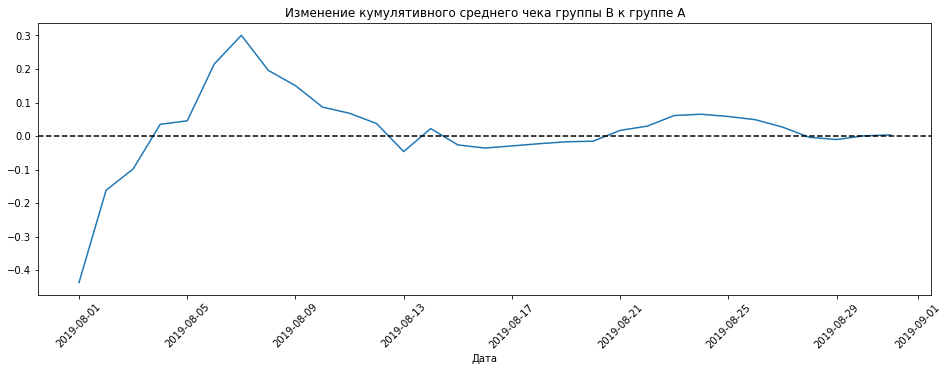

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер рисунка
plt.figure(figsize=(16, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# Добавим подписи к графику
plt.title('Изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.xticks(rotation=45);

На начальных этапах средний чек группы B был выше, чем у группы А, но в потом он стабилизировался и стал чуть больше, чем у группы А.

###  Вывод.

Изначально мы выявили теорию с самым высоким приоритетом: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

Изначально в наших данных была группа пользователей из 58 человек, которые попали в обе группы. Я их удалила сделала на их основе A/B тест.

По проверке теории, имеем следующие факты:

 -	Есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий;
 -	Есть статистически значимое различия по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий;
 -	График различия конверсии между группами сообщает, что результаты группы B лучше группы A:
 
 1) Что до фильтрации, что после неё пользователи группы B на 20% чаще покупают, чем пользователи группы А.
 
 
 -	График различия среднего чека говорит о том, что результаты группы B лучше, чем у группы А:
 
 1) До фильтрации разница составляла 28%
 
 2) После фильтрации составляет 3%
 
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа B заказывает чаще, и пусть с маленьким, но всё-таки приростом среднего чека на 3%.

Что и требовалось, мы добавляли форму подписки, люди стали заказывать чаще, то есть чаще возвращаться на сайт.